In [ ]:
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from datetime import datetime as datetime

from scipy.stats import skew  # Import the skew function
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,CatBoostRegressor, Pool, metrics, cv

pd.set_option('display.max_columns', 50)

In [ ]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
test_df = pd.read_csv(os.path.join('data', 'test.csv'))
test_ids = test_df['id']

In [ ]:
def drop_id_columns(dfs):
    for df in dfs:
        if 'id' in df.columns:
            df.drop(columns=['id'], inplace=True)
drop_id_columns([train_df, test_df])

features = train_df.columns[:-1]
target = train_df.columns[-1]

print(f'Entries in full training dataset: {len(train_df)}')

Entries in full training dataset: 1117957


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train_df[features],
    train_df[target],
    test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [135]:
predictions_val = model.predict(X_val_scaled)

def rmsle(y_truth, y_pred):
    return np.sqrt(mean_squared_log_error(y_truth, y_pred))

print(rmsle(y_val, predictions_val))

0.021151160960521304


In [139]:
X_test_scaled = scaler.transform(test_df)
predictions_test = model.predict(X_test_scaled)

sub = pd.DataFrame({'id': test_ids.values, target: predictions_test})
sub.to_csv('submission_GradientBoost_01.csv', index=False)

In [162]:
train_df[target].unique()

array([0.445, 0.45 , 0.53 , 0.535, 0.415, 0.44 , 0.46 , 0.595, 0.505,
       0.455, 0.515, 0.48 , 0.47 , 0.51 , 0.485, 0.43 , 0.525, 0.56 ,
       0.555, 0.49 , 0.405, 0.5  , 0.59 , 0.675, 0.55 , 0.57 , 0.54 ,
       0.475, 0.495, 0.4  , 0.465, 0.425, 0.52 , 0.6  , 0.575, 0.365,
       0.565, 0.435, 0.545, 0.395, 0.41 , 0.38 , 0.34 , 0.585, 0.42 ,
       0.58 , 0.635, 0.66 , 0.64 , 0.375, 0.63 , 0.35 , 0.385, 0.615,
       0.65 , 0.61 , 0.605, 0.715, 0.655, 0.645, 0.62 , 0.625, 0.37 ,
       0.39 , 0.36 , 0.69 , 0.67 , 0.685, 0.345, 0.32 , 0.68 , 0.7  ,
       0.355, 0.33 , 0.665, 0.695, 0.71 , 0.325, 0.725, 0.705, 0.335,
       0.285, 0.315])

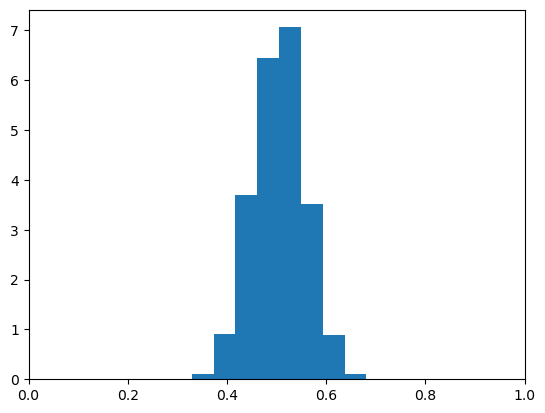

In [154]:
plt.hist(train_df[target], bins=10, density=True)
plt.xlim([0, 1])
plt.show()

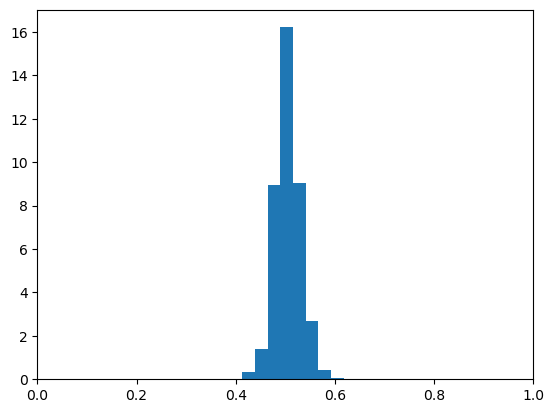

In [151]:
plt.hist(sub[target], bins=10, density=True)
plt.xlim([0, 1])
plt.show()

In [115]:
#only use subset of training data because it has over 1,117,957 entries
# X_train, _, y_train, y_val = train_test_split(train_df[features], train_df[target], test_size=0.8)

# print(f'Entries in cropped training dataset: {len(X_train)}')

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

print(f'Entries in cropped training dataset (train): {len(X_train)}')
print(f'Entries in cropped training dataset (val): {len(X_val)}')

Entries in cropped training dataset (train): 114477
Entries in cropped training dataset (val): 28620


In [119]:
model = CatBoostRegressor(logging_level='Silent')

model.fit(X_train, y_train, eval_set = (X_val, y_val), plot=False)
    

In [121]:
predictions = model.predict(test_df)
sub = pd.DataFrame(
    {
        'id': test_ids.values,
        target: predictions
        }
        )
sub.to_csv('submission.csv', index=False)